In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
path='/content/drive/MyDrive/iris.csv'
df=pd.read_csv(path)

In [27]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


<ipython-input-30-34d526868674>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<ipython-input-31-878ef56c329c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


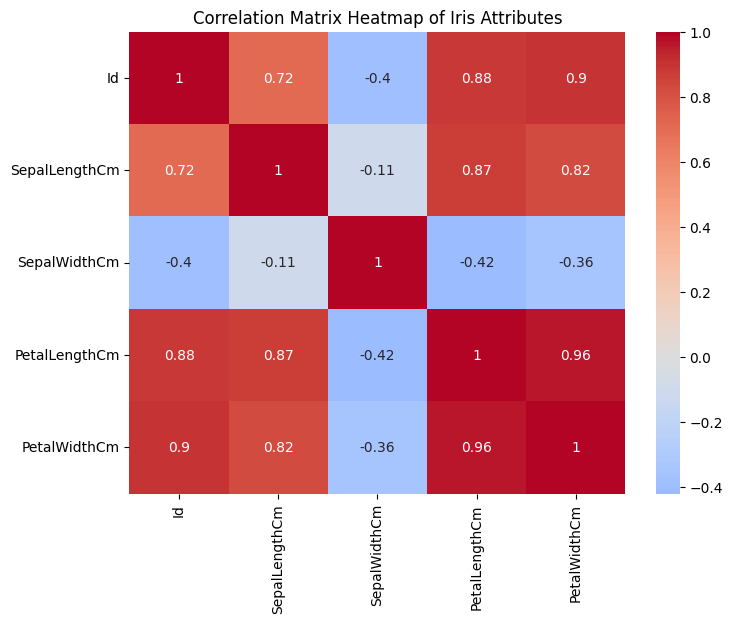

Highly correlated attributes: Id - SepalLengthCm, Correlation: 0.72
Highly correlated attributes: Id - PetalLengthCm, Correlation: 0.88
Highly correlated attributes: Id - PetalWidthCm, Correlation: 0.90
Highly correlated attributes: SepalLengthCm - PetalLengthCm, Correlation: 0.87
Highly correlated attributes: SepalLengthCm - PetalWidthCm, Correlation: 0.82
Highly correlated attributes: PetalLengthCm - PetalWidthCm, Correlation: 0.96


In [31]:
import seaborn as sns

# Calculate correlation coefficients
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap of Iris Attributes")
plt.show()

# Identify highly correlated attribute pairs
threshold = 0.7
highly_correlated = np.where(np.abs(correlation_matrix) > threshold)

# Print highly correlated pairs
for i, j in zip(*highly_correlated):
    if i != j and i < j:
        attribute_i = df.columns[i]
        attribute_j = df.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        print(f"Highly correlated attributes: {attribute_i} - {attribute_j}, Correlation: {correlation_value:.2f}")



In [32]:
# Interpretation and insights
# 1. Petal length and petal width are highly positively correlated (0.96). This implies that as the petal length increases, the petal width tends to increase as well.
# 2. Petal length and sepal length are also highly positively correlated (0.87). This suggests that flowers with longer petals tend to have longer sepals.
# 3. Petal length and sepal width have a negative correlation (-0.37). This could indicate that flowers with longer petals might have slightly narrower sepals.
# 4. Sepal length and sepal width have a weak negative correlation (-0.12), implying that flowers with longer sepals may have slightly narrower widths, but the correlation is not strong.

# Overall, the petal attributes (length and width) are strongly correlated with each other and with other attributes, suggesting that they might have a strong influence on the characteristics of iris flowers.